In [64]:
# Clustering using Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import ast
import time


def cluster_data(file_name, n_clusters):
    """Perform hierarchical clustering on data and save as csv file.

    Args:
        file_name (string): name of the data file
        n_clusters (int): no. of clusters to create
    """
    print("Clustering data (n_clusters = " + str(n_clusters) + "): " + file_name + "...")
    
    if "book" in file_name:
        dataset_path = "./Dataset/Book/"
        output_path = "./Output Clusters/Book/"
    elif "basket" in file_name:
        dataset_path = "./Dataset/Basket/"
        output_path = "./Output Clusters/Basket/"
    else:
        dataset_path = "./Dataset/"
        output_path = "./Output Clusters/"
        
    # Read data from csv
    print("Reading data from path: " + dataset_path + file_name + "...")
    data = pd.read_csv(dataset_path + file_name )
    
    # Convert string representation of list to actual list
    print("Converting string representation of list to actual list...")
    data['Vector'] = data['Vector'].apply(lambda x: ast.literal_eval(x))
    
    # Convert list of vectors into DataFrame
    print("Converting list of vectors into DataFrame...")
    vector_df = pd.DataFrame(data['Vector'].to_list())
    
    # Extract Vector column
    print("Extracting Vector column...")
    X = vector_df.values
    
    # Start time 
    start_time = time.time()
    
    # Create model
    print("Creating model...")
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    
    # Fit model and add cluster column to df
    print("Fitting model...")
    data['Cluster'] = hc.fit_predict(X)
    
    # End time
    duration = time.time() - start_time 
    
    # Save to csv
    save_csv_file = file_name.replace(".csv", "_hc_" + str(n_clusters) + ".csv")
    print("Saving data as " + output_path + save_csv_file + "...")
    data.to_csv(output_path + save_csv_file, index=False)
    
    print("Duration: " + str(duration) + " seconds")
    print("Clustering data (n_clusters = " + str(n_clusters) + "): " + file_name + " done!\n")
    return duration
    
def generate_cluster_range(file_name, n_start, n_end, n_step):
    print("Generating cluster range for " + file_name + "...")
    cluster_range = range(n_start, n_end, n_step)
    
    # Create empty DataFrame with 
    data = pd.DataFrame(columns=['n_clusters', 'duration'])
    
    # Add data to DataFrame
    for n in cluster_range:
        duration = cluster_data(file_name, n)
        data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True) # type: ignore

    print("Generating cluster range for " + file_name + ".csv done!")
    return data

# ==================================================== Testing ====================================================
# cluster_data("Basket/basket_freq_vector", 3)
# data = generate_cluster_range("basket_0.02_freq_vector.csv", 3, 12, 3)
# data.head()



In [58]:
# Clustering basket data
import os 
f_list = []
for file in os.listdir("./Dataset/Basket/"):
    if "mapping" not in file:
        f_list.append(file)
        
print("Generating cluster range for the following files: " + str(f_list) + "...")

# duration where the columns will be | file | 3 | 6 | 9 | 12 | 15 |
duration_df = pd.DataFrame(columns=['file', '3', '6', '9', '12', '15'])

# Add data to DataFrame
for file in f_list:
    print("==============================================================================================================================")
    duration_range = generate_cluster_range(file, 3, 18, 3)
    
    # convert duration_range to a list
    duration_range = duration_range['duration'].to_list()
    # add duration_range to duration_df
    duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True) # type: ignore
    
    print(duration_df.head())
    print("==============================================================================================================================")
    
duration_df.head()
duration_df.to_csv("./Output Clusters/Basket/duration.csv", index=False)
# generate_cluster_range("basket_freq_vector.csv", 3, 12, 3)

Generating cluster range for the following files: ['basket_0.01_freq_vector.csv', 'basket_0.05_freq_vector.csv', 'basket_0.02_freq_vector.csv', 'basket_0.03_freq_vector.csv', 'basket_0.04_freq_vector.csv', 'basket_vector.csv']...
Generating cluster range for basket_0.01_freq_vector.csv...
Clustering data (n_clusters = 3): basket_0.01_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.01_freq_vector.csv...
Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.01_freq_vector_hc_3.csv...
Duration: 15.599691152572632 seconds
Clustering data (n_clusters = 3): basket_0.01_freq_vector.csv done!

Clustering data (n_clusters = 6): basket_0.01_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.01_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.01_freq_vector_hc_6.csv...
Duration: 14.713701009750366 seconds
Clustering data (n_clusters = 6): basket_0.01_freq_vector.csv done!

Clustering data (n_clusters = 9): basket_0.01_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.01_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.01_freq_vector_hc_9.csv...
Duration: 14.093472957611084 seconds
Clustering data (n_clusters = 9): basket_0.01_freq_vector.csv done!

Clustering data (n_clusters = 12): basket_0.01_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.01_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.01_freq_vector_hc_12.csv...
Duration: 14.802742004394531 seconds
Clustering data (n_clusters = 12): basket_0.01_freq_vector.csv done!

Clustering data (n_clusters = 15): basket_0.01_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.01_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.01_freq_vector_hc_15.csv...
Duration: 13.878968000411987 seconds
Clustering data (n_clusters = 15): basket_0.01_freq_vector.csv done!

Generating cluster range for basket_0.01_freq_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   

          15  
0  13.878968  
Generating cluster range for basket_0.05_freq_vector.csv...
Clustering data (n_clusters = 3): basket_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.05_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.05_freq_vector_hc_3.csv...
Duration: 7.375509977340698 seconds
Clustering data (n_clusters = 3): basket_0.05_freq_vector.csv done!

Clustering data (n_clusters = 6): basket_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.05_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.05_freq_vector_hc_6.csv...
Duration: 7.438573122024536 seconds
Clustering data (n_clusters = 6): basket_0.05_freq_vector.csv done!

Clustering data (n_clusters = 9): basket_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.05_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.05_freq_vector_hc_9.csv...
Duration: 7.728663921356201 seconds
Clustering data (n_clusters = 9): basket_0.05_freq_vector.csv done!

Clustering data (n_clusters = 12): basket_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.05_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.05_freq_vector_hc_12.csv...
Duration: 6.729247331619263 seconds
Clustering data (n_clusters = 12): basket_0.05_freq_vector.csv done!

Clustering data (n_clusters = 15): basket_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.05_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.05_freq_vector_hc_15.csv...
Duration: 8.070066928863525 seconds
Clustering data (n_clusters = 15): basket_0.05_freq_vector.csv done!

Generating cluster range for basket_0.05_freq_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   
1  basket_0.05_freq_vector.csv   7.375510   7.438573   7.728664   6.729247   

          15  
0  13.878968  
1   8.070067  
Generating cluster range for basket_0.02_freq_vector.csv...
Clustering data (n_clusters = 3): basket_0.02_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.02_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.02_freq_vector_hc_3.csv...
Duration: 11.262420892715454 seconds
Clustering data (n_clusters = 3): basket_0.02_freq_vector.csv done!

Clustering data (n_clusters = 6): basket_0.02_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.02_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.02_freq_vector_hc_6.csv...
Duration: 12.186249256134033 seconds
Clustering data (n_clusters = 6): basket_0.02_freq_vector.csv done!

Clustering data (n_clusters = 9): basket_0.02_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.02_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.02_freq_vector_hc_9.csv...
Duration: 12.373034954071045 seconds
Clustering data (n_clusters = 9): basket_0.02_freq_vector.csv done!

Clustering data (n_clusters = 12): basket_0.02_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.02_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.02_freq_vector_hc_12.csv...
Duration: 11.279874086380005 seconds
Clustering data (n_clusters = 12): basket_0.02_freq_vector.csv done!

Clustering data (n_clusters = 15): basket_0.02_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.02_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.02_freq_vector_hc_15.csv...
Duration: 10.266127109527588 seconds
Clustering data (n_clusters = 15): basket_0.02_freq_vector.csv done!

Generating cluster range for basket_0.02_freq_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   
1  basket_0.05_freq_vector.csv   7.375510   7.438573   7.728664   6.729247   
2  basket_0.02_freq_vector.csv  11.262421  12.186249  12.373035  11.279874   

          15  
0  13.878968  
1   8.070067  
2  10.266127  
Generating cluster range for basket_0.03_freq_vector.csv...
Clustering data (n_clusters = 3): basket_0.03_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.03_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.03_freq_vector_hc_3.csv...
Duration: 9.511945962905884 seconds
Clustering data (n_clusters = 3): basket_0.03_freq_vector.csv done!

Clustering data (n_clusters = 6): basket_0.03_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.03_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.03_freq_vector_hc_6.csv...
Duration: 9.870980024337769 seconds
Clustering data (n_clusters = 6): basket_0.03_freq_vector.csv done!

Clustering data (n_clusters = 9): basket_0.03_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.03_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.03_freq_vector_hc_9.csv...
Duration: 11.039576053619385 seconds
Clustering data (n_clusters = 9): basket_0.03_freq_vector.csv done!

Clustering data (n_clusters = 12): basket_0.03_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.03_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.03_freq_vector_hc_12.csv...
Duration: 9.734606742858887 seconds
Clustering data (n_clusters = 12): basket_0.03_freq_vector.csv done!

Clustering data (n_clusters = 15): basket_0.03_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.03_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.03_freq_vector_hc_15.csv...
Duration: 9.670593023300171 seconds
Clustering data (n_clusters = 15): basket_0.03_freq_vector.csv done!

Generating cluster range for basket_0.03_freq_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   
1  basket_0.05_freq_vector.csv   7.375510   7.438573   7.728664   6.729247   
2  basket_0.02_freq_vector.csv  11.262421  12.186249  12.373035  11.279874   
3  basket_0.03_freq_vector.csv   9.511946   9.870980  11.039576   9.734607   

          15  
0  13.878968  
1   8.070067  
2  10.266127  
3   9.670593  
Generating cluster range for basket_0.04_freq_vector.csv...
Clustering data (n_clusters = 3): basket_0.04_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.04_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.04_freq_vector_hc_3.csv...
Duration: 7.7503039836883545 seconds
Clustering data (n_clusters = 3): basket_0.04_freq_vector.csv done!

Clustering data (n_clusters = 6): basket_0.04_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.04_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.04_freq_vector_hc_6.csv...
Duration: 8.276311159133911 seconds
Clustering data (n_clusters = 6): basket_0.04_freq_vector.csv done!

Clustering data (n_clusters = 9): basket_0.04_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.04_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.04_freq_vector_hc_9.csv...
Duration: 8.81649899482727 seconds
Clustering data (n_clusters = 9): basket_0.04_freq_vector.csv done!

Clustering data (n_clusters = 12): basket_0.04_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.04_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.04_freq_vector_hc_12.csv...
Duration: 9.191028833389282 seconds
Clustering data (n_clusters = 12): basket_0.04_freq_vector.csv done!

Clustering data (n_clusters = 15): basket_0.04_freq_vector.csv...
Reading data from path: ./Dataset/Basket/basket_0.04_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_0.04_freq_vector_hc_15.csv...
Duration: 8.017571210861206 seconds
Clustering data (n_clusters = 15): basket_0.04_freq_vector.csv done!

Generating cluster range for basket_0.04_freq_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   
1  basket_0.05_freq_vector.csv   7.375510   7.438573   7.728664   6.729247   
2  basket_0.02_freq_vector.csv  11.262421  12.186249  12.373035  11.279874   
3  basket_0.03_freq_vector.csv   9.511946   9.870980  11.039576   9.734607   
4  basket_0.04_freq_vector.csv   7.750304   8.276311   8.816499   9.191029   

          15  
0  13.878968  
1   8.070067  
2  10.266127  
3   9.670593  
4   8.017571  
Generating cluster range for basket_vector.csv...
Clustering data (n_clusters = 3): basket_vector.csv...
Reading data from path: ./Dataset/Basket/basket_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_vector_hc_3.csv...
Duration: 27.704519033432007 seconds
Clustering data (n_clusters = 3): basket_vector.csv done!

Clustering data (n_clusters = 6): basket_vector.csv...
Reading data from path: ./Dataset/Basket/basket_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_vector_hc_6.csv...
Duration: 25.420573949813843 seconds
Clustering data (n_clusters = 6): basket_vector.csv done!

Clustering data (n_clusters = 9): basket_vector.csv...
Reading data from path: ./Dataset/Basket/basket_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_vector_hc_9.csv...
Duration: 23.998247146606445 seconds
Clustering data (n_clusters = 9): basket_vector.csv done!

Clustering data (n_clusters = 12): basket_vector.csv...
Reading data from path: ./Dataset/Basket/basket_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_vector_hc_12.csv...
Duration: 25.41034483909607 seconds
Clustering data (n_clusters = 12): basket_vector.csv done!

Clustering data (n_clusters = 15): basket_vector.csv...
Reading data from path: ./Dataset/Basket/basket_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Basket/basket_vector_hc_15.csv...
Duration: 30.668181896209717 seconds
Clustering data (n_clusters = 15): basket_vector.csv done!

Generating cluster range for basket_vector.csv.csv done!
                          file          3          6          9         12  \
0  basket_0.01_freq_vector.csv  15.599691  14.713701  14.093473  14.802742   
1  basket_0.05_freq_vector.csv   7.375510   7.438573   7.728664   6.729247   
2  basket_0.02_freq_vector.csv  11.262421  12.186249  12.373035  11.279874   
3  basket_0.03_freq_vector.csv   9.511946   9.870980  11.039576   9.734607   
4  basket_0.04_freq_vector.csv   7.750304   8.276311   8.816499   9.191029   

          15  
0  13.878968  
1   8.070067  
2  10.266127  
3   9.670593  
4   8.017571  


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2570455119.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/938909012.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


In [56]:
# Clustering Book Data
import os
f_list = []

for file in os.listdir("./Dataset/Book/"):
    if "mapping" not in file:
        f_list.append(file)
        
print("Generating cluster range for the following files: " + str(f_list) + "...")

# duration where the columns will be | file | 3 | 6 | 9 | 12 | 15 |
duration_df = pd.DataFrame(columns=['file', '3', '6', '9', '12', '15'])

# Add data to DataFrame
for file in f_list:
    print("==============================================================================================================================")
    duration_range = generate_cluster_range(file, 3, 18, 3)
    
    # convert duration_range to a list
    duration_range = duration_range['duration'].to_list()
    # add duration_range to duration_df
    duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True) # type: ignore
    
    print(duration_df.head())
    print("==============================================================================================================================")
    
duration_df.head()
duration_df.to_csv("./Output Clusters/Book/duration.csv", index=False)

Generating cluster range for the following files: ['book_vector.csv', 'book_0.11_freq_vector.csv', 'book_0.08_freq_vector.csv', 'book_0.07_freq_vector.csv', 'book_0.09_freq_vector.csv', 'book_0.06_freq_vector.csv', 'book_0.12_freq_vector.csv', 'book_0.1_freq_vector.csv', 'book_0.15_freq_vector.csv', 'book_0.14_freq_vector.csv', 'book_0.13_freq_vector.csv', 'book_0.05_freq_vector.csv']...
Generating cluster range for book_vector.csv...
Clustering data (n_clusters = 3): book_vector.csv...
Reading data from path: ./Dataset/Book/book_vector.csv...
Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_vector_hc_3.csv...
Duration: 186.80601716041565 seconds
Clustering data (n_clusters = 3): book_vector.csv done!

Clustering data (n_clusters = 6): book_vector.csv...
Reading data from path: ./Dataset/Book/book_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_vector_hc_6.csv...
Duration: 231.57898807525635 seconds
Clustering data (n_clusters = 6): book_vector.csv done!

Clustering data (n_clusters = 9): book_vector.csv...
Reading data from path: ./Dataset/Book/book_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_vector_hc_9.csv...
Duration: 201.565190076828 seconds
Clustering data (n_clusters = 9): book_vector.csv done!

Clustering data (n_clusters = 12): book_vector.csv...
Reading data from path: ./Dataset/Book/book_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_vector_hc_12.csv...
Duration: 205.85286688804626 seconds
Clustering data (n_clusters = 12): book_vector.csv done!

Clustering data (n_clusters = 15): book_vector.csv...
Reading data from path: ./Dataset/Book/book_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_vector_hc_15.csv...
Duration: 193.91100192070007 seconds
Clustering data (n_clusters = 15): book_vector.csv done!

Generating cluster range for book_vector.csv.csv done!
              file           3           6          9          12          15
0  book_vector.csv  186.806017  231.578988  201.56519  205.852867  193.911002
Generating cluster range for book_0.11_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.11_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.11_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.11_freq_vector_hc_3.csv...
Duration: 0.768592119216919 seconds
Clustering data (n_clusters = 3): book_0.11_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.11_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.11_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.11_freq_vector_hc_6.csv...
Duration: 0.7901308536529541 seconds
Clustering data (n_clusters = 6): book_0.11_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.11_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.11_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.11_freq_vector_hc_9.csv...
Duration: 0.80889892578125 seconds
Clustering data (n_clusters = 9): book_0.11_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.11_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.11_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.11_freq_vector_hc_12.csv...
Duration: 0.8648557662963867 seconds
Clustering data (n_clusters = 12): book_0.11_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.11_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.11_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.11_freq_vector_hc_15.csv...
Duration: 0.813209056854248 seconds
Clustering data (n_clusters = 15): book_0.11_freq_vector.csv done!

Generating cluster range for book_0.11_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   

           15  
0  193.911002  
1    0.813209  
Generating cluster range for book_0.08_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.08_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.08_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.08_freq_vector_hc_3.csv...
Duration: 1.0529539585113525 seconds
Clustering data (n_clusters = 3): book_0.08_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.08_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.08_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.08_freq_vector_hc_6.csv...
Duration: 1.1698839664459229 seconds
Clustering data (n_clusters = 6): book_0.08_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.08_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.08_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.08_freq_vector_hc_9.csv...
Duration: 1.0270521640777588 seconds
Clustering data (n_clusters = 9): book_0.08_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.08_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.08_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.08_freq_vector_hc_12.csv...
Duration: 1.0594658851623535 seconds
Clustering data (n_clusters = 12): book_0.08_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.08_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.08_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.08_freq_vector_hc_15.csv...
Duration: 1.0121290683746338 seconds
Clustering data (n_clusters = 15): book_0.08_freq_vector.csv done!

Generating cluster range for book_0.08_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
Generating cluster range for book_0.07_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.07_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.07_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.07_freq_vector_hc_3.csv...
Duration: 1.1502976417541504 seconds
Clustering data (n_clusters = 3): book_0.07_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.07_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.07_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.07_freq_vector_hc_6.csv...
Duration: 1.1569879055023193 seconds
Clustering data (n_clusters = 6): book_0.07_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.07_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.07_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.07_freq_vector_hc_9.csv...
Duration: 1.1017379760742188 seconds
Clustering data (n_clusters = 9): book_0.07_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.07_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.07_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.07_freq_vector_hc_12.csv...
Duration: 1.2246122360229492 seconds
Clustering data (n_clusters = 12): book_0.07_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.07_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.07_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.07_freq_vector_hc_15.csv...
Duration: 1.1935789585113525 seconds
Clustering data (n_clusters = 15): book_0.07_freq_vector.csv done!

Generating cluster range for book_0.07_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
Generating cluster range for book_0.09_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.09_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.09_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.09_freq_vector_hc_3.csv...
Duration: 0.933790922164917 seconds
Clustering data (n_clusters = 3): book_0.09_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.09_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.09_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.09_freq_vector_hc_6.csv...
Duration: 0.8952009677886963 seconds
Clustering data (n_clusters = 6): book_0.09_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.09_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.09_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.09_freq_vector_hc_9.csv...
Duration: 0.8982913494110107 seconds
Clustering data (n_clusters = 9): book_0.09_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.09_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.09_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.09_freq_vector_hc_12.csv...
Duration: 0.8629028797149658 seconds
Clustering data (n_clusters = 12): book_0.09_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.09_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.09_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.09_freq_vector_hc_15.csv...
Duration: 0.9040689468383789 seconds
Clustering data (n_clusters = 15): book_0.09_freq_vector.csv done!

Generating cluster range for book_0.09_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.06_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.06_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.06_freq_vecto

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.06_freq_vector_hc_3.csv...
Duration: 1.418076992034912 seconds
Clustering data (n_clusters = 3): book_0.06_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.06_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.06_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.06_freq_vector_hc_6.csv...
Duration: 1.479496955871582 seconds
Clustering data (n_clusters = 6): book_0.06_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.06_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.06_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.06_freq_vector_hc_9.csv...
Duration: 1.620934247970581 seconds
Clustering data (n_clusters = 9): book_0.06_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.06_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.06_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.06_freq_vector_hc_12.csv...
Duration: 1.4761881828308105 seconds
Clustering data (n_clusters = 12): book_0.06_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.06_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.06_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.06_freq_vector_hc_15.csv...
Duration: 1.470149040222168 seconds
Clustering data (n_clusters = 15): book_0.06_freq_vector.csv done!

Generating cluster range for book_0.06_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.12_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.12_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.12_freq_vector

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.12_freq_vector_hc_3.csv...
Duration: 0.7328579425811768 seconds
Clustering data (n_clusters = 3): book_0.12_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.12_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.12_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.12_freq_vector_hc_6.csv...
Duration: 0.8058328628540039 seconds
Clustering data (n_clusters = 6): book_0.12_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.12_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.12_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.12_freq_vector_hc_9.csv...
Duration: 0.7856760025024414 seconds
Clustering data (n_clusters = 9): book_0.12_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.12_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.12_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.12_freq_vector_hc_12.csv...
Duration: 0.7677953243255615 seconds
Clustering data (n_clusters = 12): book_0.12_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.12_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.12_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.12_freq_vector_hc_15.csv...
Duration: 0.7773079872131348 seconds
Clustering data (n_clusters = 15): book_0.12_freq_vector.csv done!

Generating cluster range for book_0.12_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.1_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.1_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.1_freq_vector.c

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.1_freq_vector_hc_3.csv...
Duration: 1.040112018585205 seconds
Clustering data (n_clusters = 3): book_0.1_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.1_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.1_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.1_freq_vector_hc_6.csv...
Duration: 0.9003031253814697 seconds
Clustering data (n_clusters = 6): book_0.1_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.1_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.1_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.1_freq_vector_hc_9.csv...
Duration: 0.9037680625915527 seconds
Clustering data (n_clusters = 9): book_0.1_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.1_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.1_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.1_freq_vector_hc_12.csv...
Duration: 0.9799220561981201 seconds
Clustering data (n_clusters = 12): book_0.1_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.1_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.1_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.1_freq_vector_hc_15.csv...
Duration: 0.8878049850463867 seconds
Clustering data (n_clusters = 15): book_0.1_freq_vector.csv done!

Generating cluster range for book_0.1_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.15_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.15_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.15_freq_vector.c

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.15_freq_vector_hc_3.csv...
Duration: 0.7487761974334717 seconds
Clustering data (n_clusters = 3): book_0.15_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.15_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.15_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.15_freq_vector_hc_6.csv...
Duration: 0.82369065284729 seconds
Clustering data (n_clusters = 6): book_0.15_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.15_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.15_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.15_freq_vector_hc_9.csv...
Duration: 0.9024031162261963 seconds
Clustering data (n_clusters = 9): book_0.15_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.15_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.15_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.15_freq_vector_hc_12.csv...
Duration: 0.7609789371490479 seconds
Clustering data (n_clusters = 12): book_0.15_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.15_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.15_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...
Saving data as ./Output Clusters/Book/book_0.15_freq_vector_hc_15.csv...
Duration: 0.8333041667938232 seconds
Clustering data (n_clusters = 15): book_0.15_freq_vector.csv done!

Generating cluster range for book_0.15_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.14_freq_vector.csv...
Clustering dat

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.14_freq_vector_hc_3.csv...
Duration: 0.8053839206695557 seconds
Clustering data (n_clusters = 3): book_0.14_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.14_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.14_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.14_freq_vector_hc_6.csv...
Duration: 0.7368979454040527 seconds
Clustering data (n_clusters = 6): book_0.14_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.14_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.14_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...
Saving data as ./Output Clusters/Book/book_0.14_freq_vector_hc_9.csv...
Duration: 0.8025069236755371 seconds
Clustering data (n_clusters = 9): book_0.14_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.14_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.14_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.14_freq_vector_hc_12.csv...
Duration: 0.7515130043029785 seconds
Clustering data (n_clusters = 12): book_0.14_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.14_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.14_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.14_freq_vector_hc_15.csv...
Duration: 0.9532170295715332 seconds
Clustering data (n_clusters = 15): book_0.14_freq_vector.csv done!

Generating cluster range for book_0.14_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.13_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.13_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.13_freq_vecto

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.13_freq_vector_hc_3.csv...
Duration: 0.8559720516204834 seconds
Clustering data (n_clusters = 3): book_0.13_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.13_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.13_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.13_freq_vector_hc_6.csv...
Duration: 0.7969908714294434 seconds
Clustering data (n_clusters = 6): book_0.13_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.13_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.13_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.13_freq_vector_hc_9.csv...
Duration: 0.7961428165435791 seconds
Clustering data (n_clusters = 9): book_0.13_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.13_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.13_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.13_freq_vector_hc_12.csv...
Duration: 0.7878828048706055 seconds
Clustering data (n_clusters = 12): book_0.13_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.13_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.13_freq_vector.csv...
Converting string representation of list to actual list...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.13_freq_vector_hc_15.csv...
Duration: 1.0416581630706787 seconds
Clustering data (n_clusters = 15): book_0.13_freq_vector.csv done!

Generating cluster range for book_0.13_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  
Generating cluster range for book_0.05_freq_vector.csv...
Clustering data (n_clusters = 3): book_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.05_freq_vecto

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.05_freq_vector_hc_3.csv...
Duration: 1.8397977352142334 seconds
Clustering data (n_clusters = 3): book_0.05_freq_vector.csv done!

Clustering data (n_clusters = 6): book_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.05_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.05_freq_vector_hc_6.csv...
Duration: 1.7870137691497803 seconds
Clustering data (n_clusters = 6): book_0.05_freq_vector.csv done!

Clustering data (n_clusters = 9): book_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.05_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.05_freq_vector_hc_9.csv...
Duration: 1.8232171535491943 seconds
Clustering data (n_clusters = 9): book_0.05_freq_vector.csv done!

Clustering data (n_clusters = 12): book_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.05_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.05_freq_vector_hc_12.csv...
Duration: 1.8461298942565918 seconds
Clustering data (n_clusters = 12): book_0.05_freq_vector.csv done!

Clustering data (n_clusters = 15): book_0.05_freq_vector.csv...
Reading data from path: ./Dataset/Book/book_0.05_freq_vector.csv...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)


Converting string representation of list to actual list...
Converting list of vectors into DataFrame...
Extracting Vector column...
Creating model...
Fitting model...


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Saving data as ./Output Clusters/Book/book_0.05_freq_vector_hc_15.csv...
Duration: 1.8432562351226807 seconds
Clustering data (n_clusters = 15): book_0.05_freq_vector.csv done!

Generating cluster range for book_0.05_freq_vector.csv.csv done!
                        file           3           6           9          12  \
0            book_vector.csv  186.806017  231.578988  201.565190  205.852867   
1  book_0.11_freq_vector.csv    0.768592    0.790131    0.808899    0.864856   
2  book_0.08_freq_vector.csv    1.052954    1.169884    1.027052    1.059466   
3  book_0.07_freq_vector.csv    1.150298    1.156988    1.101738    1.224612   
4  book_0.09_freq_vector.csv    0.933791    0.895201    0.898291    0.862903   

           15  
0  193.911002  
1    0.813209  
2    1.012129  
3    1.193579  
4    0.904069  


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2472593214.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'n_clusters': n, 'duration': duration}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_96269/2288603193.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duration_df = duration_df.append({'file': file, '3': duration_range[0], '6': duration_range[1], '9': duration_range[2], '12': duration_range[3], '15': duration_range[4]}, ignore_index=True)


In [59]:
import os
from sklearn.metrics import silhouette_score

output_path = "./Output Clusters/"

def get_silhouette_score(data_file):
    if "basket" in data_file:
        df = pd.read_csv(output_path + "Basket/" + data_file)
    elif "book" in data_file:
        df = pd.read_csv(output_path + "Book/" + data_file)
        
    features = [ast.literal_eval(i) for i in df['Vector']]
    labels = list(df['Cluster'])
    return silhouette_score(features, labels)

def generate_scores(data_name):
    # get all files with different cluster sizes
    
    # get file path based on the data name
    if "basket" in data_name:
        file_path = "./Output Clusters/Basket/"
    elif "book" in data_name:
        file_path = "./Output Clusters/Book/"
    else:
        print("Invalid data name")
        return
    
    # Create dictionary to store scores
    scores = {}
    for f in os.listdir(file_path):
        if data_name in f:
            scores[f] = get_silhouette_score(f)
    # sort scores by cluster size
    scores = dict(sorted(scores.items(), key=lambda item: int(item[0].split("_hc_")[1].split(".")[0])))

    return scores

def save_silhouette_scores(data_type):
    """Save the silhouette scores into a csv file. Rows will be the frequency vectors and columns will be the cluster sizes."""
    if "Basket" in data_type:
        directory = "./Output Clusters/Basket/"
    elif "Book" in data_type:
        directory = "./Output Clusters/Book/"
    else:
        print("Invalid data type")
        return
    
    # get sets of configurations based on the file name
    configurations = set()
    cluster_list = set()
    
    for f in os.listdir(directory):
        if '_hc_' in f:
            # delete the end of file from _hc_ onwards
            configurations.add(f.split("_hc_")[0])
            cluster_list.add(f.split("_hc_")[1].split(".")[0])
        
    # sort 
    configurations = sorted(list(configurations))
    cluster_list = sorted([int(i) for i in list(cluster_list)])
    
    print(configurations)
    print(cluster_list)
    
    
    data_df = pd.DataFrame(columns= ["Configurations"] + cluster_list)
    # print(data_df)
    
    for c in configurations:
        score_dict = generate_scores(c)
        print(score_dict)
        data_row = [c]
        for k, v in score_dict.items():
            data_row.append(v)
        data_df.loc[len(data_df)] = data_row
            
    print(data_df)  

    data_df.to_csv("./Output Clusters/" + data_type + '/' + data_type.lower() + "_silhouette_scores.csv", index=False)
    print("Saved silhouette scores to " + "./Output Clusters/" + data_type + '/' + data_type.lower() + "_silhouette_scores.csv")

# print(get_silhouette_score("Book/book_0.05_freq_vector_hc_3.csv"))
# print(generate_scores("book_0.05_freq_vector"))

save_silhouette_scores("Book")

# print(get_silhouette_score("Basket/basket_0.02_freq_vector_hc_3.csv"))
# print(generate_scores("basket_0.02_freq_vector"))
save_silhouette_scores("Basket")

['book_0.05_freq_vector', 'book_0.06_freq_vector', 'book_0.07_freq_vector', 'book_0.08_freq_vector', 'book_0.09_freq_vector', 'book_0.11_freq_vector', 'book_0.12_freq_vector', 'book_0.13_freq_vector', 'book_0.14_freq_vector', 'book_0.15_freq_vector', 'book_0.1_freq_vector', 'book_vector']
[3, 6, 9, 12, 15]


{'book_0.05_freq_vector_hc_3.csv': 0.1894758962228238, 'book_0.05_freq_vector_hc_6.csv': 0.18942032559512312, 'book_0.05_freq_vector_hc_9.csv': 0.18496116252477213, 'book_0.05_freq_vector_hc_12.csv': 0.183839437081724, 'book_0.05_freq_vector_hc_15.csv': 0.1845196246448473}
{'book_0.06_freq_vector_hc_3.csv': 0.16023288836546687, 'book_0.06_freq_vector_hc_6.csv': 0.15946628743917168, 'book_0.06_freq_vector_hc_9.csv': 0.1612682613736634, 'book_0.06_freq_vector_hc_12.csv': 0.161957907304043, 'book_0.06_freq_vector_hc_15.csv': 0.15239269482967321}
{'book_0.07_freq_vector_hc_3.csv': 0.13478085866327852, 'book_0.07_freq_vector_hc_6.csv': 0.1085781049534111, 'book_0.07_freq_vector_hc_9.csv': 0.11584031228426316, 'book_0.07_freq_vector_hc_12.csv': 0.1174735151963293, 'book_0.07_freq_vector_hc_15.csv': 0.11877659597656624}
{'book_0.08_freq_vector_hc_3.csv': 0.200573940848182, 'book_0.08_freq_vector_hc_6.csv': 0.12561341961821157, 'book_0.08_freq_vector_hc_9.csv': 0.13386065396683816, 'book_0.08_

            Configurations         3         6         9        12        15
0  basket_0.01_freq_vector -0.028666 -0.043178 -0.056225 -0.052251 -0.041429
1  basket_0.02_freq_vector -0.033329 -0.019070  0.004609  0.025977  0.048802
2  basket_0.03_freq_vector  0.013250  0.050467  0.085495  0.123083  0.157369
3  basket_0.04_freq_vector  0.165600  0.198868  0.279011  0.356382  0.438221
4  basket_0.05_freq_vector  0.272153  0.394093  0.516547  0.646435  0.684693
5            basket_vector -0.021516 -0.030541 -0.042376 -0.038302 -0.046273
                                3         6         9        12        15
Configurations                                                           
basket_0.01_freq_vector -0.028666 -0.043178 -0.056225 -0.052251 -0.041429
basket_0.02_freq_vector -0.033329 -0.019070  0.004609  0.025977  0.048802
basket_0.03_freq_vector  0.013250  0.050467  0.085495  0.123083  0.157369
basket_0.04_freq_vector  0.165600  0.198868  0.279011  0.356382  0.438221
basket_0.05_freq_

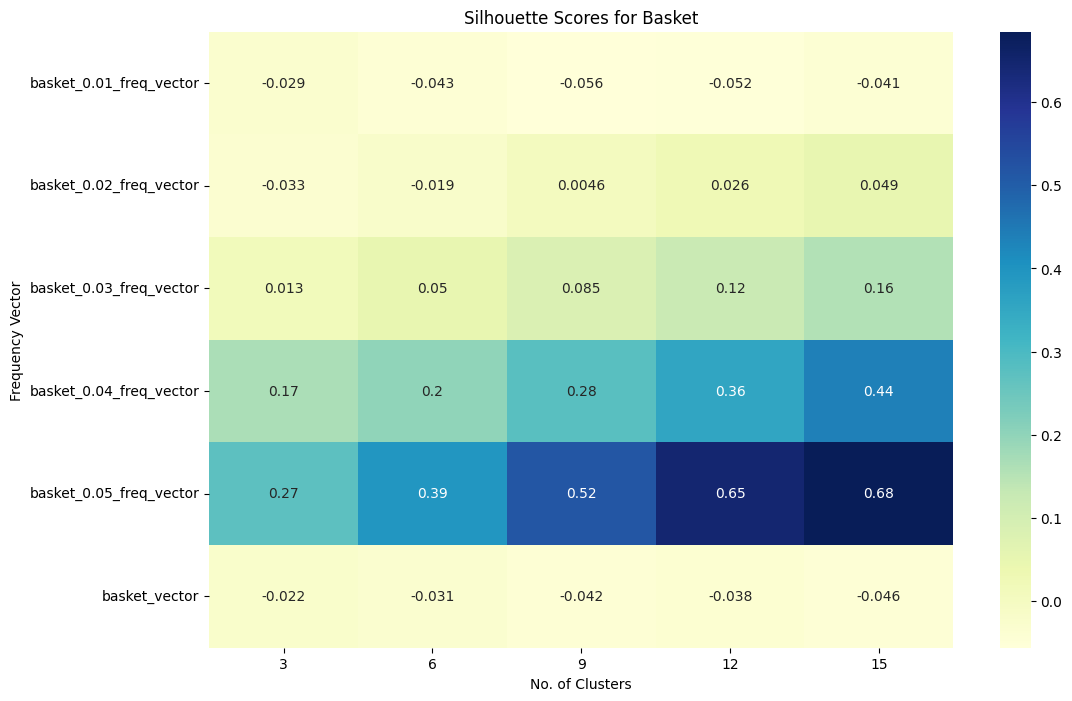

           Configurations         3         6         9        12        15
0   book_0.05_freq_vector  0.189476  0.189420  0.184961  0.183839  0.184520
1   book_0.06_freq_vector  0.160233  0.159466  0.161268  0.161958  0.152393
2   book_0.07_freq_vector  0.134781  0.108578  0.115840  0.117474  0.118777
3   book_0.08_freq_vector  0.200574  0.125613  0.133861  0.096189  0.100734
4   book_0.09_freq_vector  0.280779  0.279557  0.259726  0.226313  0.118757
5   book_0.11_freq_vector  0.283167  0.273965  0.265881  0.092997  0.099473
6   book_0.12_freq_vector  0.316091  0.312041  0.290432  0.163644 -0.019431
7   book_0.13_freq_vector  0.323823  0.305730  0.276951  0.040347  0.053579
8   book_0.14_freq_vector  0.336587  0.175099  0.190380  0.135395  0.114744
9   book_0.15_freq_vector  0.312616  0.253301  0.265606  0.140255  0.062236
10   book_0.1_freq_vector  0.309572  0.303164  0.274556  0.068352  0.074908
11            book_vector  0.120975  0.104616  0.106858  0.107276  0.108438
            

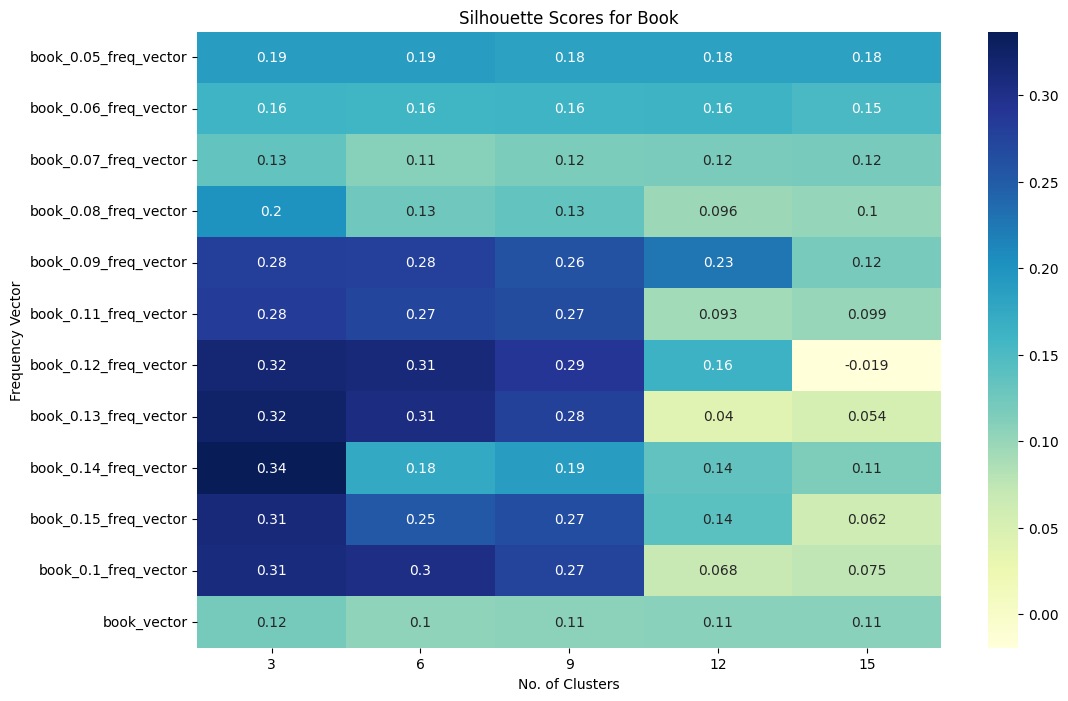

In [61]:
# Comparing silhouette scores
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_silhouette_scores(data_type):
    if "Basket" in data_type:
        file_path = "./Output Clusters/Basket/basket_silhouette_scores.csv"
    elif "Book" in data_type:
        file_path = "./Output Clusters/Book/book_silhouette_scores.csv"
    else:
        print("Invalid data type")
        return
    
    df = pd.read_csv(file_path)
    print(df)
    
    df = df.set_index("Configurations")
    print(df)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(df, annot=True, cmap="YlGnBu")
    plt.title("Silhouette Scores for " + data_type)
    plt.xlabel("No. of Clusters")
    plt.ylabel("Frequency Vector")
    plt.show()
    
plot_silhouette_scores("Basket")
plot_silhouette_scores("Book")

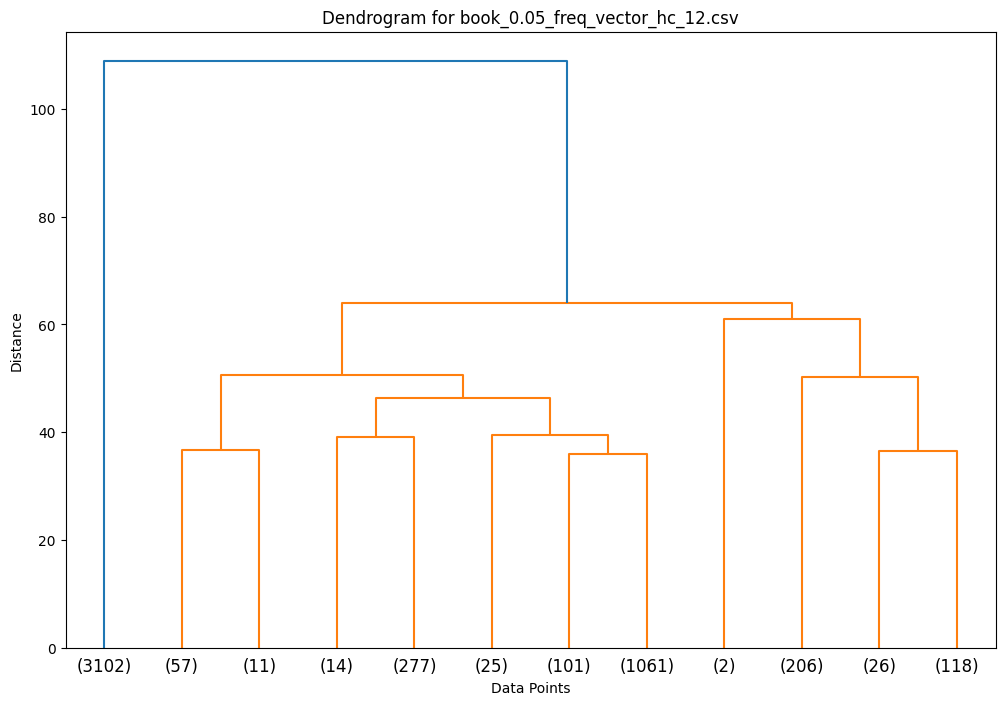

In [63]:
# Dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data_file, n_clusters):
    if "basket" in data_file:
        df = pd.read_csv("./Output Clusters/Basket/" + data_file)
    elif "book" in data_file:
        df = pd.read_csv("./Output Clusters/Book/" + data_file)
    else:
        print("Invalid data file")
        return
    
    features = [ast.literal_eval(i) for i in df['Vector']]
    labels = list(df['Cluster'])
    
    # create linkage matrix
    Z = linkage(features, 'ward')
    
    # plot dendrogram
    plt.figure(figsize=(12, 8))
    plt.title("Dendrogram for " + data_file)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    dendrogram(Z, truncate_mode='lastp', p=n_clusters)
    plt.show()
    
# plot_dendrogram("basket_0.02_freq_vector_hc_3.csv", 3)
# plot_dendrogram("book_0.05_freq_vector_hc_3.csv", 3)
# plot_dendrogram("basket_0.02_freq_vector_hc_6.csv", 6)
plot_dendrogram("book_0.05_freq_vector_hc_12.csv", 12)


## Archive

In [ ]:
# Show cluster membership in a table
print(df.head())
# Save the result to csv
df.to_csv('./Output Clusters/hierarchical_3_clusters.csv')

# Show scatter plot of data colored by cluster
import matplotlib.pyplot as plt

# # Convert 'Vectors' column to a list of lists
# vectors = df['Vector'].tolist()

# # Separate the vectors into two lists
# x_values = [vector[0] for vector in vectors]
# y_values = [vector[1] for vector in vectors]

# # Plot the data points
# plt.scatter(x_values, y_values, c=df['Cluster'], cmap='rainbow')
# plt.show()

In [ ]:
# Create Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, 'ward')

plt.figure(figsize=(15, 10))
# Create a dendrogram
dendrogram(Z, labels=df.index.values.tolist(), leaf_rotation=90, leaf_font_size=8)

# Show the plot
plt.show()